# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 2-4 refer to @alregamo on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP).
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [1]:
full_name = 'Danial Ataie'
student_id = '99100455'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 3 Convolutational Neural Networks (CNN)

In this problem, you are going to compare the results of a simple CNN with a pre-trained deep learning model such as VGG16 for a classification task.

For this purpose, we are going to use a publicly available dataset, named CIFAR10. The CIFAR-10 dataset is a popular benchmark in the field of machine learning for image recognition tasks. Here are the key points about this dataset:

1. **Content**: The CIFAR-10 dataset consists of 60,000 32x32 color images. These images are divided into 10 different classes, representing different objects. The classes are airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

2. **Structure**: The dataset is split into two parts: 50,000 images for training and 10,000 images for testing. Each class in the dataset is represented equally, with 6,000 images per class.

3. **Purpose**: CIFAR-10 is widely used for training and evaluating machine learning and image processing systems. It's a benchmark dataset for developing and testing machine learning algorithms, especially in the field of computer vision.

4. **Challenge**: The relatively low resolution of the images (32x32 pixels) makes it a challenging dataset for image classification tasks. The small size of the images means that the details that distinguish between the classes can be quite subtle.

### 3.1 Data Loading

Load the dataset with <code>torchvision.datasets</code> or <code>tensorflow.keras.datasets</code> and split the data into training and test sets.

In [2]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

170498071/170498071 [==============================] - 13s 0us/step


### 3.2 CNN Model

Build a simple 3-layer CNN model, which takes CIFAR10 images as input and classify their labels. Feel free to use <code>BatchNorm</code> or <code>Pooling</code> layers between your <code>Conv</code> layers. Use 2 layers of fully connected <code>Linear</code> or <code>Dense</code> layers for classificaton.

After building your model, make a summary of your architecture using <code>model.summary()</code> in Keras or <code> torchsummary</code> library for pytorch models.

In [3]:
from keras import models, layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### 3.3 Train your Model

Train your model for 20 epochs by using Adam optimizer for the training. Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well.

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

Epoch 1/20
1250/1250 [==============================] - 14s 7ms/step - loss: 1.3651 - accuracy: 0.5178 - val_loss: 1.4852 - val_accuracy: 0.4945
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9937 - accuracy: 0.6476 - val_loss: 1.0420 - val_accuracy: 0.6291
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8254 - accuracy: 0.7099 - val_loss: 1.0618 - val_accuracy: 0.6397
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7075 - accuracy: 0.7520 - val_loss: 0.9251 - val_accuracy: 0.6852
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6079 - accuracy: 0.7855 - val_loss: 0.9020 - val_accuracy: 0.6979
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5217 - accuracy: 0.8161 - val_loss: 1.2827 - val_accuracy: 0.6218
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4533 - accuracy: 0.8390 - val_loss: 1.0367 - val_accuracy

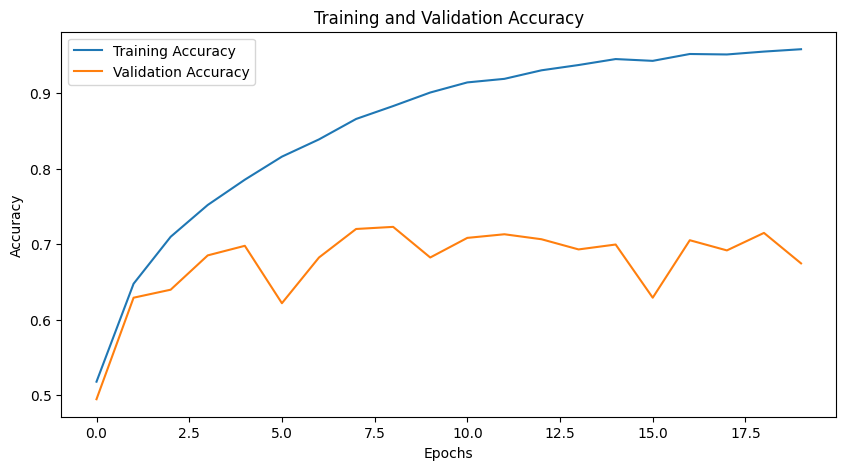

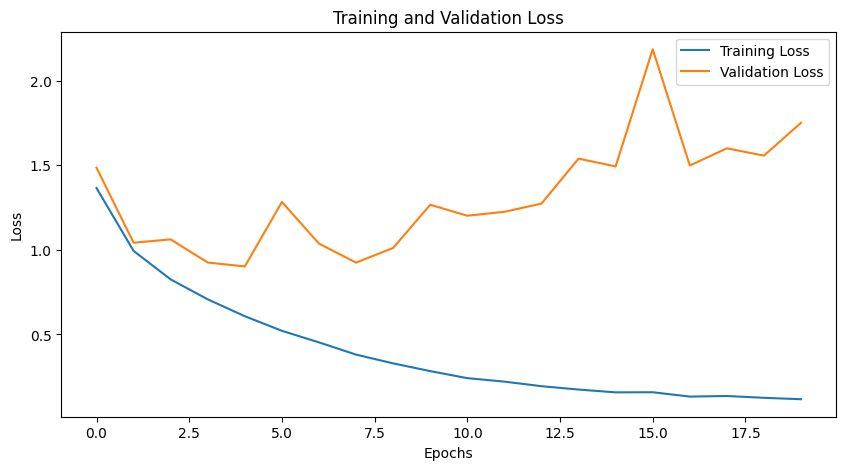

In [4]:
import matplotlib.pyplot as plt
from keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.4 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

313/313 [==============================] - 1s 2ms/step


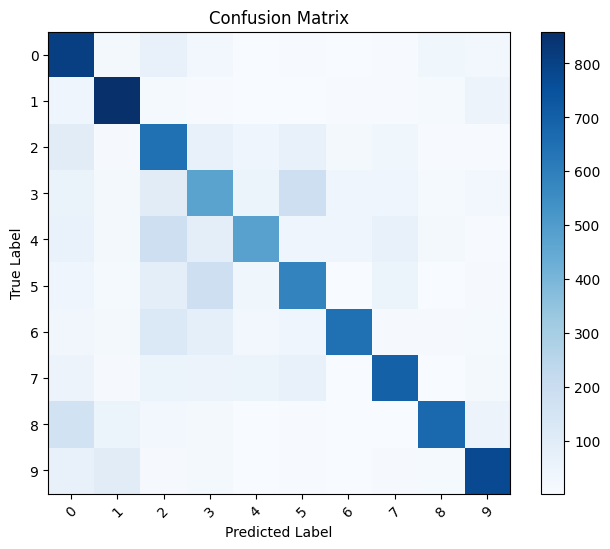

313/313 [==============================] - 1s 3ms/step - loss: 1.8161 - accuracy: 0.6638
Final Accuracy on Test Set: 66.38%


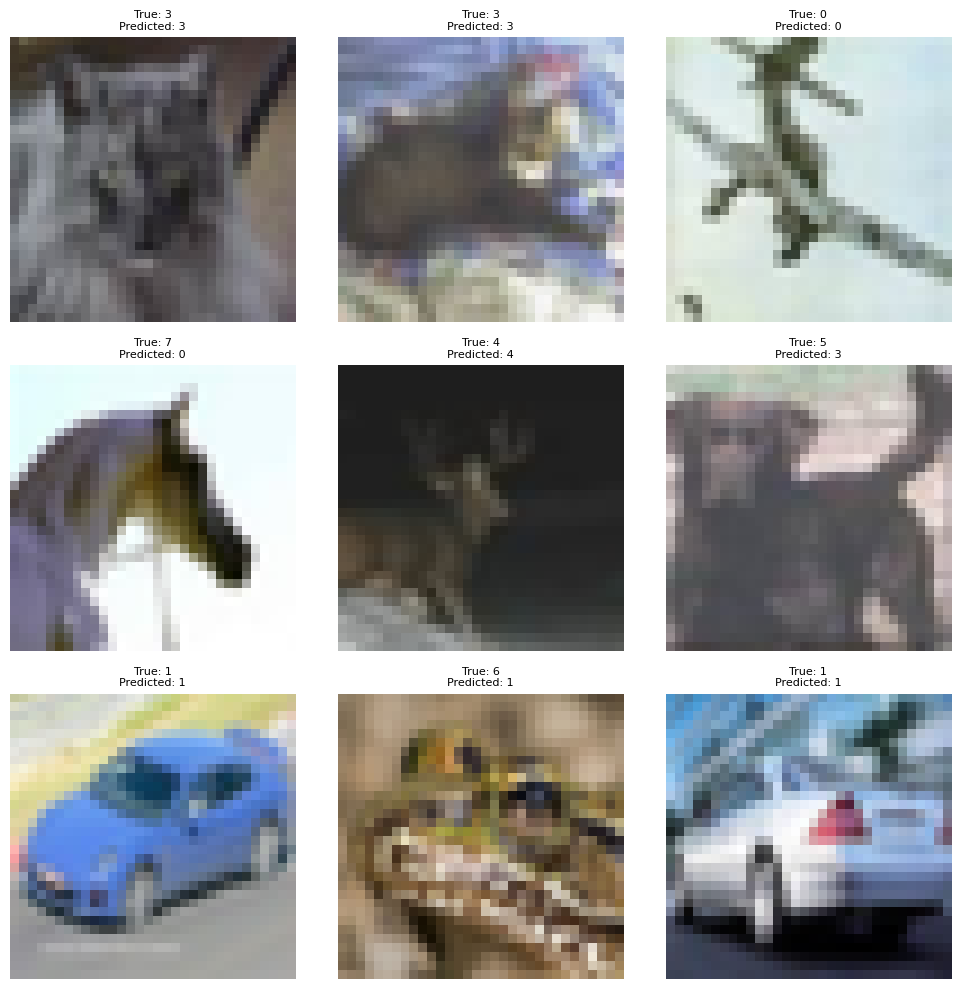

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
from random import randint


predictions = np.argmax(model.predict(test_images), axis=-1)

cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Final Accuracy on Test Set: {accuracy * 100:.2f}%')

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = randint(0, len(test_images) - 1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title(f'True: {test_labels[idx][0]}\nPredicted: {predictions[idx]}', fontsize=8)
plt.tight_layout()
plt.show()

### VGG16 Model and Transfer Learning

VGG16 is a popular convolutional neural network (CNN) architecture that was introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford in a 2014 paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition." Here are the key points about the VGG16 model:

1. **Architecture**: VGG16 is named for its 16 layers that have weights. The architecture is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. The final architecture includes several fully connected layers.

2. **Uniform Design**: One of the defining aspects of VGG16 is its uniformity. All hidden layers use the same 3x3 convolutional filters with a stride of 1 and the same max pooling filters of 2x2 with a stride of 2. This consistency makes the architecture easy to scale and adapt.

3. **Depth**: The depth of the network (16 layers) was a significant feature at the time of its introduction. The increased depth helps the network to learn more complex patterns in the data.

4. **Performance**: In the ImageNet competition, which is a benchmark in image classification, VGG16 significantly improved upon the architectures that had been used previously, demonstrating the power of deeper neural networks.

5. **Applications**: VGG16, and its larger counterpart VGG19, are widely used in image processing. They are used both as standalone models for image classification tasks and as feature extraction parts of larger models in more complex tasks.

6. **Transfer Learning**: Due to its simplicity and high performance on benchmark datasets, VGG16 is often used as a pre-trained model for transfer learning, especially in tasks where training data might be limited. In this context, VGG16 trained on a large dataset like ImageNet is adapted to a new task with a relatively small amount of new data.

7. **Resource Intensity**: One downside of VGG16 is that it is resource-intensive, both in terms of the number of parameters and computation. This can make it less practical for deployment in resource-constrained environments.

VGG16 represents a key milestone in the development of deep learning architectures for image recognition, and it remains a popular choice for both academic and practical applications in the field of computer vision.

Here we want to use a VGG16 pre-trained model (trained on the ImageNet dataset) and use a transfer learning approach to fine-tune the model for our dataset.

Certainly! Fine-tuning a pre-trained VGG16 model on the CIFAR-10 dataset is a common practice in deep learning, especially to demonstrate the power of transfer learning. Here are the steps and explanations you can provide to your students:

#### Understanding Transfer Learning and Fine-Tuning
- **Transfer Learning**: It's a technique where a model developed for one task is reused as the starting point for a model on a second task. It's especially popular in deep learning where large models take a lot of resources to train.
- **Fine-Tuning**: Involves tweaking the pre-trained model slightly to adapt it to a new, but similar task. In this case, fine-tuning a VGG16 model pre-trained on ImageNet to work on CIFAR-10.


### 3.5 Building your Model

Importing the VGG16 Model from TensorFlow or PyTorch models and load the model with pre-trained weights.

CIFAR-10 images are 32x32 pixels, much smaller than the ImageNet images VGG16 was trained on (224x224 pixels). Decide on a strategy to handle this (e.g., resize CIFAR-10 images or modify the VGG16 input layer). Also, CIFAR-10 images need to be preprocessed to be compatible with VGG16. This includes normalizing pixel values in the same way as was done for the ImageNet images.

For this preprocessing steps, you can use <code>torchvision.transforms</code> in PyTorch or <code>tensorflow.keras.preprocessing.image.ImageDataGenerator</code> in TensorFlow.

Besides, you need to replace the output layer (or fully connected layers) of VGG16 to match the number of classes in CIFAR-10 (10 classes). This is because the original VGG16 model output is designed for 1,000 classes (ImageNet).

"Freeze" the weights of the earlier layers of the model. This means the weights in these layers won’t be updated during training. Usually, the earlier layers of a CNN capture generic features like edges and textures that are also useful for new tasks.

Only the weights of the newly added output layer (and possibly the previous fully connected layers) of the model is need to be trained.

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

# Load VGG16 model with pre-trained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the pre-trained VGG16 model
for layer in vgg_model.layers[:-4]:
    print(layer)
    layer.trainable = False

flatten = Flatten()(vgg_model.output)
fc = Dense(256, activation='relu')(flatten)
output = Dense(10, activation='softmax')(fc)  # 10 classes for CIFAR-10

# Combine the VGG16 base model with the new output layer
new_model = Model(inputs=vgg_model.input, outputs=output)
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


### 3.6 Training your Model
Train the model on the CIFAR-10 training data for 20 epochs by using Adam optimizer. Remember you only need to update the weights of the unfrozen layers to adapt the model to the CIFAR-10 dataset.

Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well.

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

Epoch 1/20
1250/1250 [==============================] - 25s 18ms/step - loss: 1.1947 - accuracy: 0.5791 - val_loss: 0.9631 - val_accuracy: 0.6671
Epoch 2/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.8523 - accuracy: 0.7099 - val_loss: 0.8639 - val_accuracy: 0.7014
Epoch 3/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.7506 - accuracy: 0.7430 - val_loss: 0.7762 - val_accuracy: 0.7350
Epoch 4/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6679 - accuracy: 0.7684 - val_loss: 0.7921 - val_accuracy: 0.7383
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.6061 - accuracy: 0.7898 - val_loss: 0.8546 - val_accuracy: 0.7279
Epoch 6/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.5471 - accuracy: 0.8086 - val_loss: 0.7847 - val_accuracy: 0.7530
Epoch 7/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.4896 - accuracy: 0.8285 - val_loss: 0.8824 -

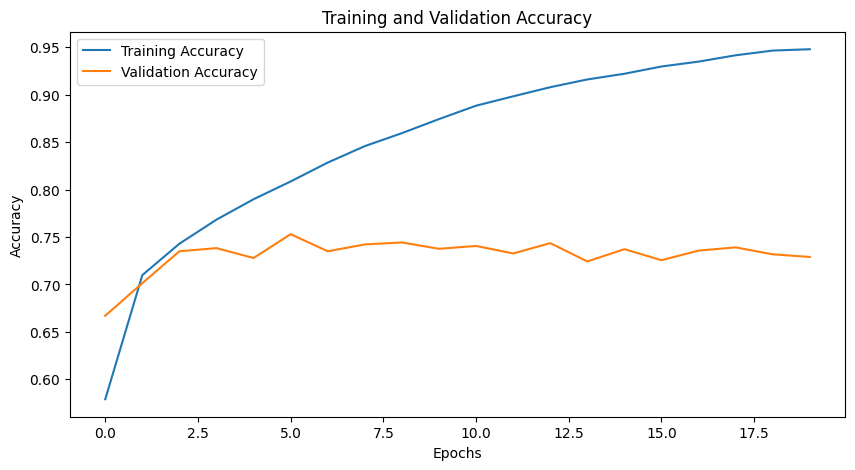

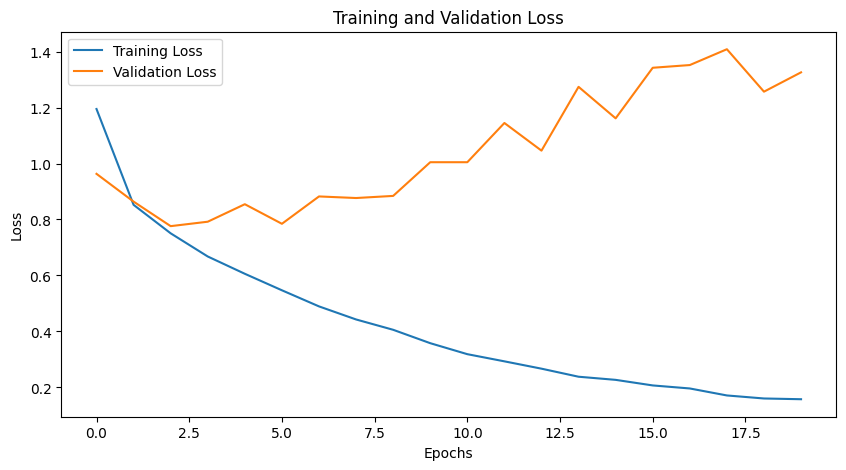

In [7]:
import matplotlib.pyplot as plt

history = new_model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.7 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

313/313 [==============================] - 2s 7ms/step


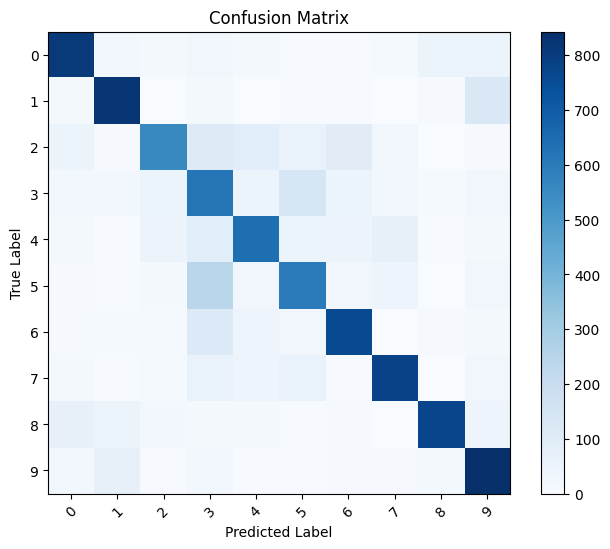

313/313 [==============================] - 3s 8ms/step - loss: 1.3945 - accuracy: 0.7194
Final Accuracy on Test Set: 71.94%


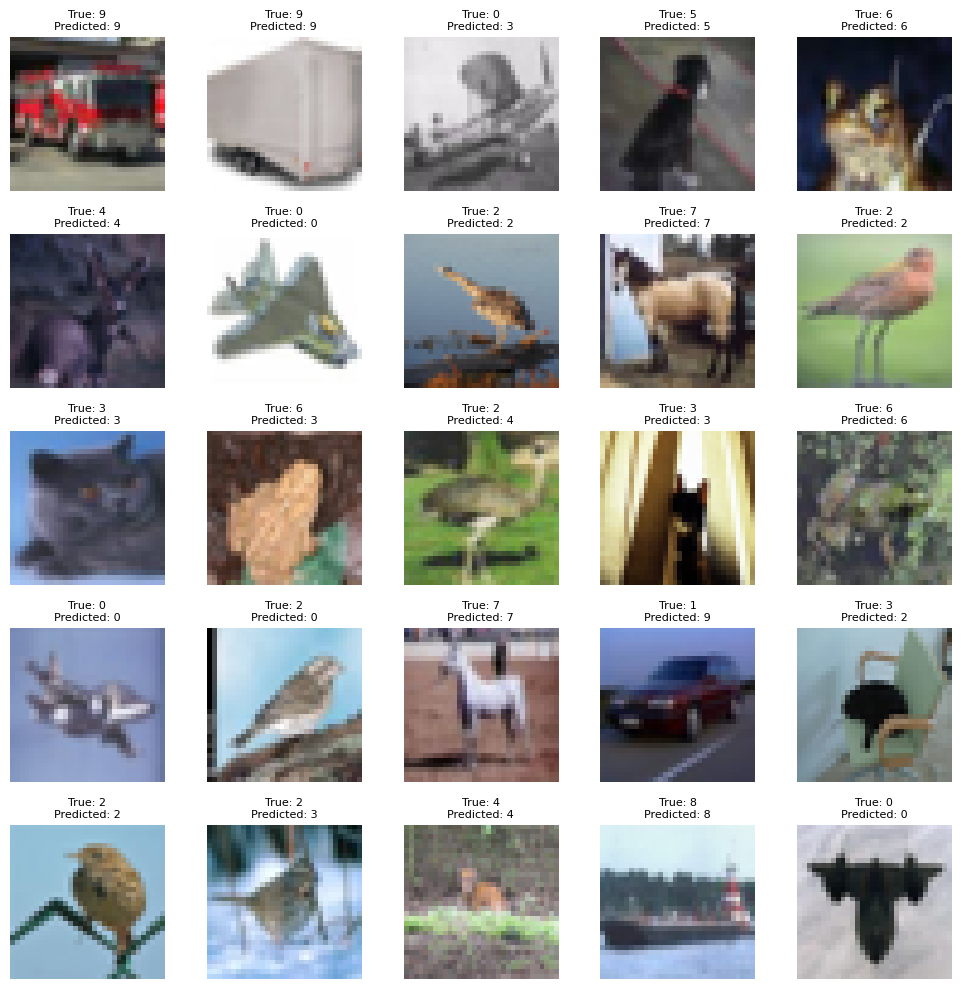

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from random import randint

predictions = np.argmax(new_model.predict(test_images), axis=-1)

cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

loss, accuracy = new_model.evaluate(test_images, test_labels)
print(f'Final Accuracy on Test Set: {accuracy * 100:.2f}%')

plt.figure(figsize=(10, 10))
for i in range(25):
    idx = randint(0, len(test_images) - 1)
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title(f'True: {test_labels[idx][0]}\nPredicted: {predictions[idx]}', fontsize=8)
plt.tight_layout()
plt.show()

### 3.8 Discussing and Comparison
- Discuss the advantages of transfer learning in terms of training time and accuracy scores.
- Also, cover potential drawbacks, like overfitting if the new dataset is too small or too different from the original dataset the model was trained on.

## Pros and Cons of Transfer Learning

### Pros:
1. **Reduced Training Time:** Transfer learning significantly reduces training time by leveraging pre-trained models with learned features.
2. **Improved Generalization:** Leveraging knowledge from pre-trained models helps in better generalization to new datasets.
3. **Performance with Limited Data:** Transfer learning performs well even with limited data, preventing overfitting.

### Cons:
1. **Overfitting on Smaller or Dissimilar Datasets:** Transfer learning may lead to overfitting if the new dataset is too small or different.
2. **Domain Shift Issues:** Significant differences between source and target domains can affect performance.
3. **Lack of Adaptability:** Pre-trained models might not adapt well to entirely different target dataset domains.

Transfer learning offers efficiency and better generalization, but careful adjustments and considerations are necessary to prevent overfitting and ensure adaptation to new data characteristics.